What is Abalone?

Ans - A huge marine gastropod mollusk, abalone is pronounced "ab-ah-LOW-nee" 
The chilly waters of New Zealand, Australia, South Africa, Japan, and the west coast of North America are where the huge sea snail is most frequently observed. Its meat is particularly appreciated, savoury, and rich; it is regarded as a culinary delicacy. Abalone is frequently offered live in the shell, frozen, or canned, making it one of the priciest seafood species available. Despite the fact that it can be eaten raw or added to other meals, it is frequently chopped into thick steaks and pan-fried.

In [4]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
# getting the provided dataset
df = pd.read_csv('Abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


the attributes of the dataset are as follows -

1 - sex - nominal - m, f, and i (infant)
2 - length - continuous - mm - longest shell measurement
3 - diameter - continuous - mm - perpendicular to length
4 - height - continuous - mm - with meat in shell
5 - whole weight - continuous - grams - whole abalone
6 - shucked weight - continuous - grams - weight of meat
7 - viscera weight - continuous - grams - gut weight (after bleeding)
8 - shell weight - continuous - grams - after being dried
9 - rings - integer - -- - +1.5 gives the age in years

The value to be predicted is the number of rings

In [6]:
# to check the data type of each column
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
# to number of rows and columns of a given dataframe
df.shape

(4177, 9)

In [8]:
# to count count the number of missing values in each row and column
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [9]:
# to check the counts of unique values
print(df['Sex'].value_counts(),'\n')

M    1528
I    1342
F    1307
Name: Sex, dtype: int64 



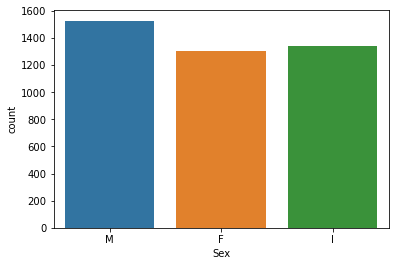

In [10]:
# to represent the occurrence of the observations in the categorical variable
sns.countplot(df['Sex'])
plt.show()

the observations from the data presented above are as follows -

1 - categorical data is balanced as observed above

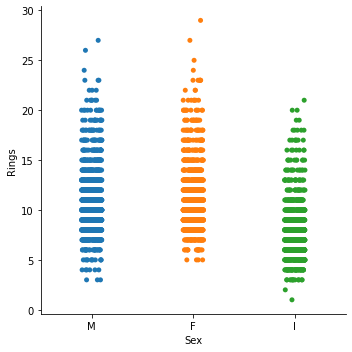

In [11]:
# drawing categorical plots using catplot 
sns.catplot(x='Sex',y='Rings', data=df )
plt.show()

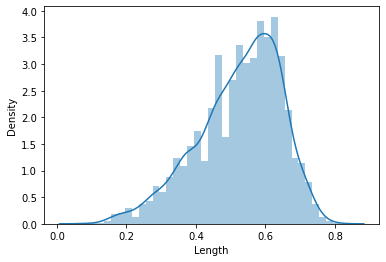

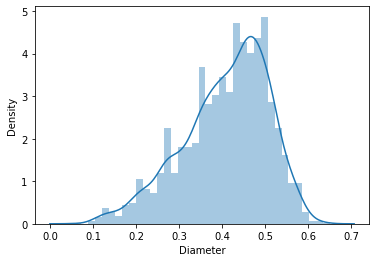

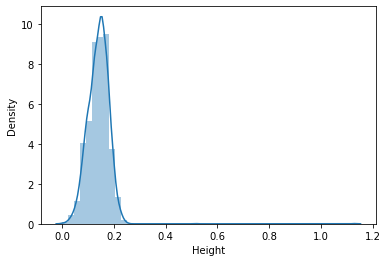

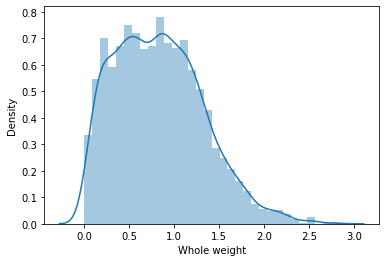

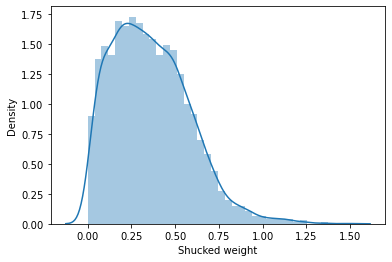

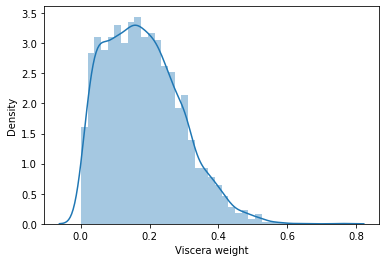

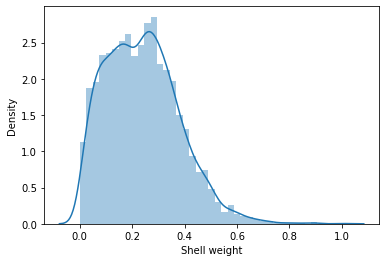

In [12]:
df_cont = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']

# to get the plot with the density distribution for continuous variables
for i in df_cont:
    sns.distplot(df[i], kde=True)
    plt.show()

the observations from the data presented above are as follows -

1 - length and diameter exhibit a similar skewness in the distribution
2 - whole weight, shucked weight, viscera weight, shell weight exhibit a similar skewness in the distribution
3 - height exhibits a higher skewness in the distribution

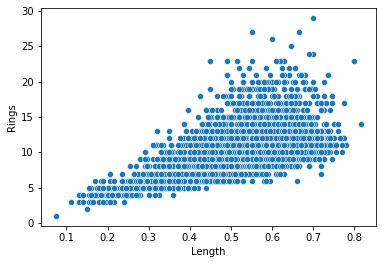

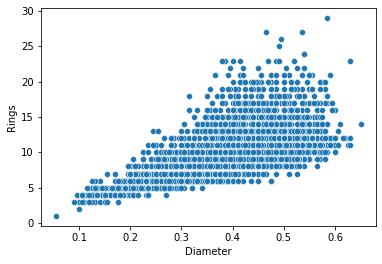

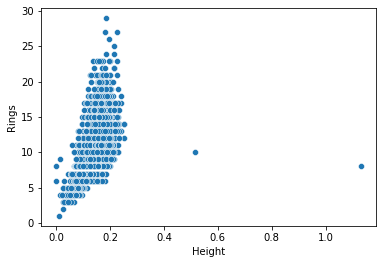

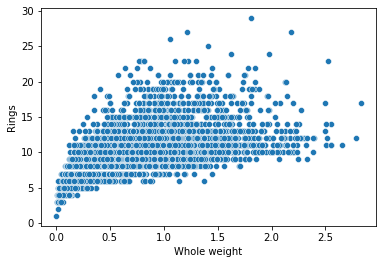

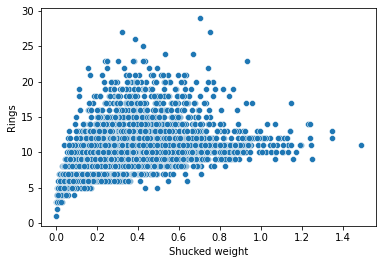

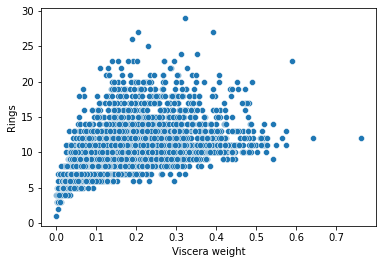

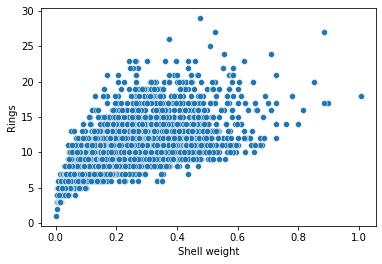

In [13]:
# to see the relationships between two variables
y = df['Rings']

for i in df_cont:
    x = df[i]
    sns.scatterplot(x, y, data=df)
    plt.show()

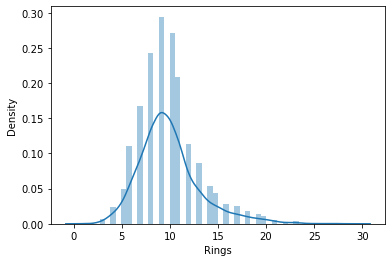

In [14]:
# to get the plot with the density distribution
sns.distplot(df['Rings'], kde=True)
plt.show()

In [2]:
!pip install --upgrade category_encoders

In [15]:
# using the encoding technique of converting categorical variables
from category_encoders import BinaryEncoder

enc = BinaryEncoder()

df = enc.fit_transform(df)
df.head()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
# statistical summary
df.describe()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.634187,0.687096,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.481715,0.463731,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,1.000000,1.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.000000,1.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [17]:
# to find the pairwise correlation of all columns 
df.corr()

,Sex_0,Sex_1,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex_0,1.000000,-0.512528,-0.236543,-0.240376,-0.215459,-0.252038,-0.251793,-0.242194,-0.235391,-0.181831
Sex_1,-0.512528,1.000000,-0.309666,-0.318626,-0.298421,-0.299741,-0.263991,-0.308444,-0.306319,-0.250279
Length,-0.236543,-0.309666,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.240376,-0.318626,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.215459,-0.298421,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.252038,-0.299741,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.251793,-0.263991,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.242194,-0.308444,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.235391,-0.306319,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.181831,-0.250279,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


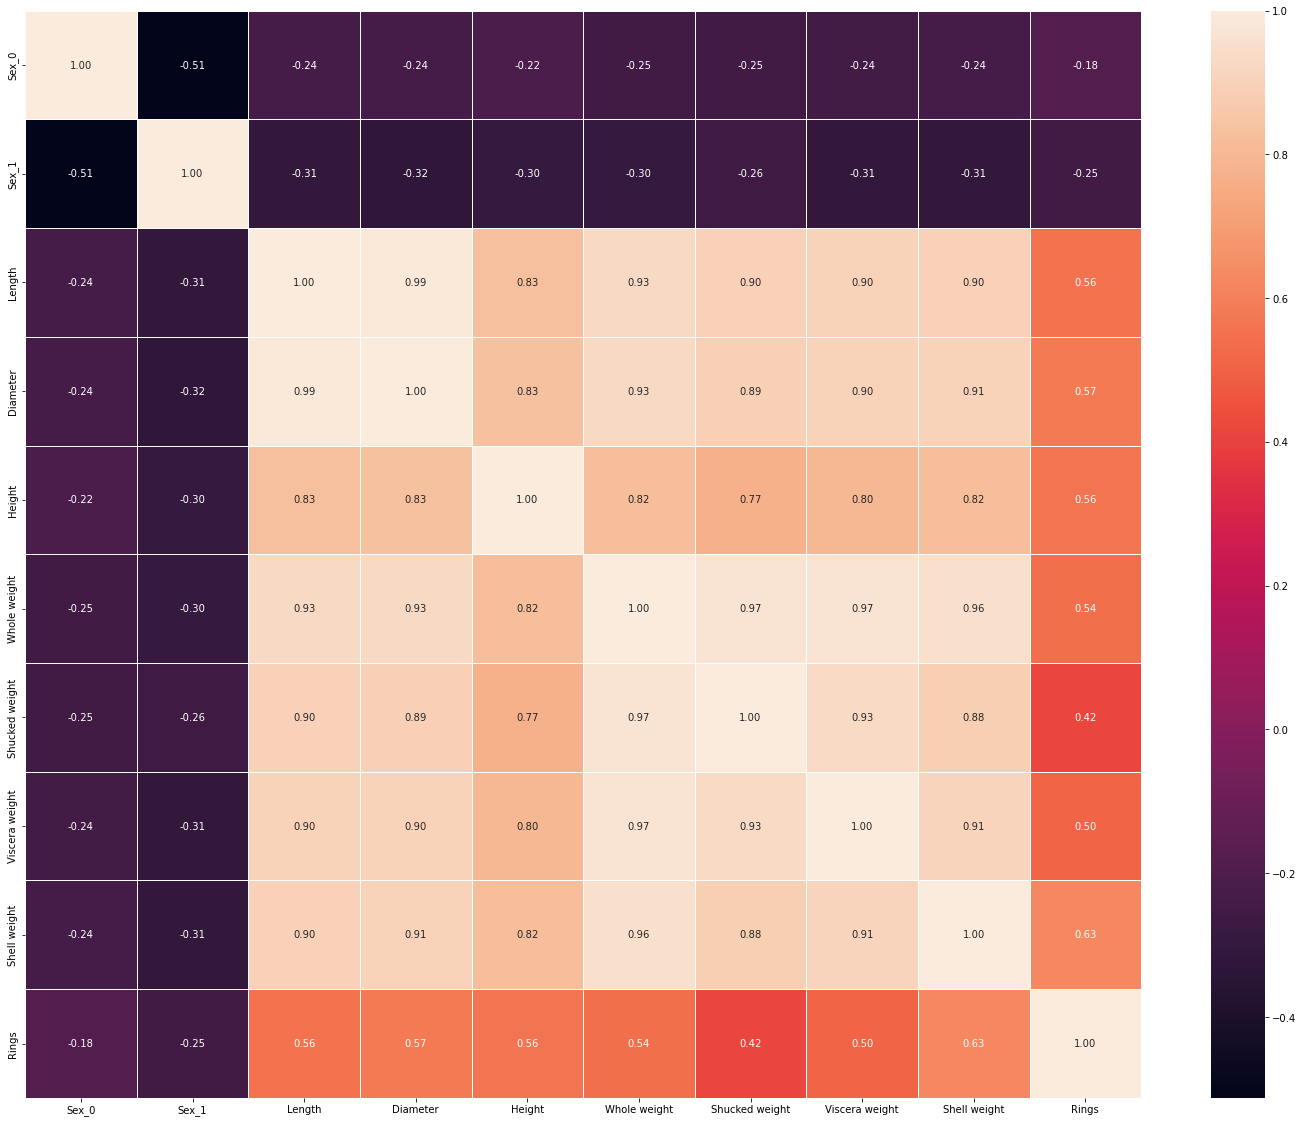

In [20]:
# using the heatmap to vizualize the correlation 
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='white', fmt='0.2f')
plt.show()

the observations from the data presented above are as follows -

1 - collinearity exists
2 - handle multicollinearity before training the model

In [21]:
# sorting the dataframe in the descending order
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex_0            -0.181831
Sex_1            -0.250279
Name: Rings, dtype: float64

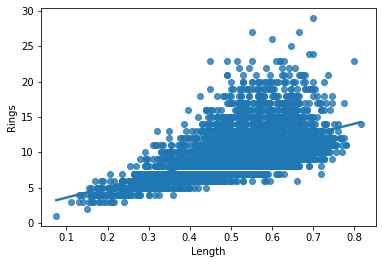

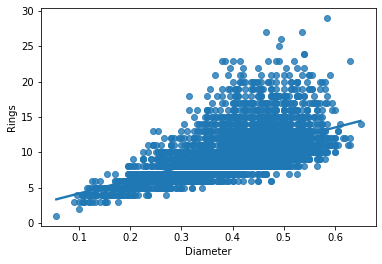

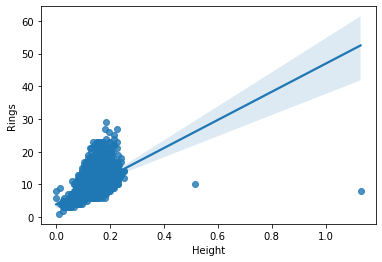

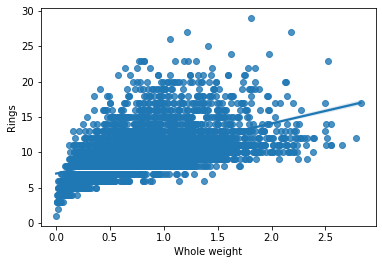

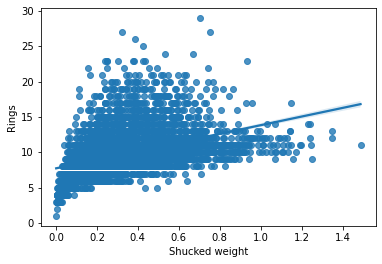

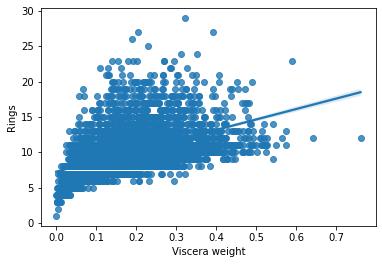

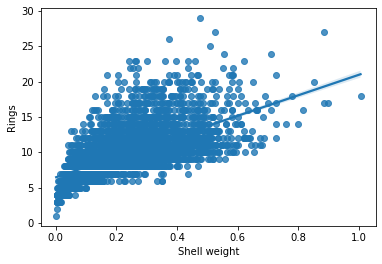

In [22]:
# scatter plot to vizualize the relationship
b = df['Rings']
a = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']

for i in a:
    x = df[i]
    sns.regplot(x, b, data=df)
    plt.show()

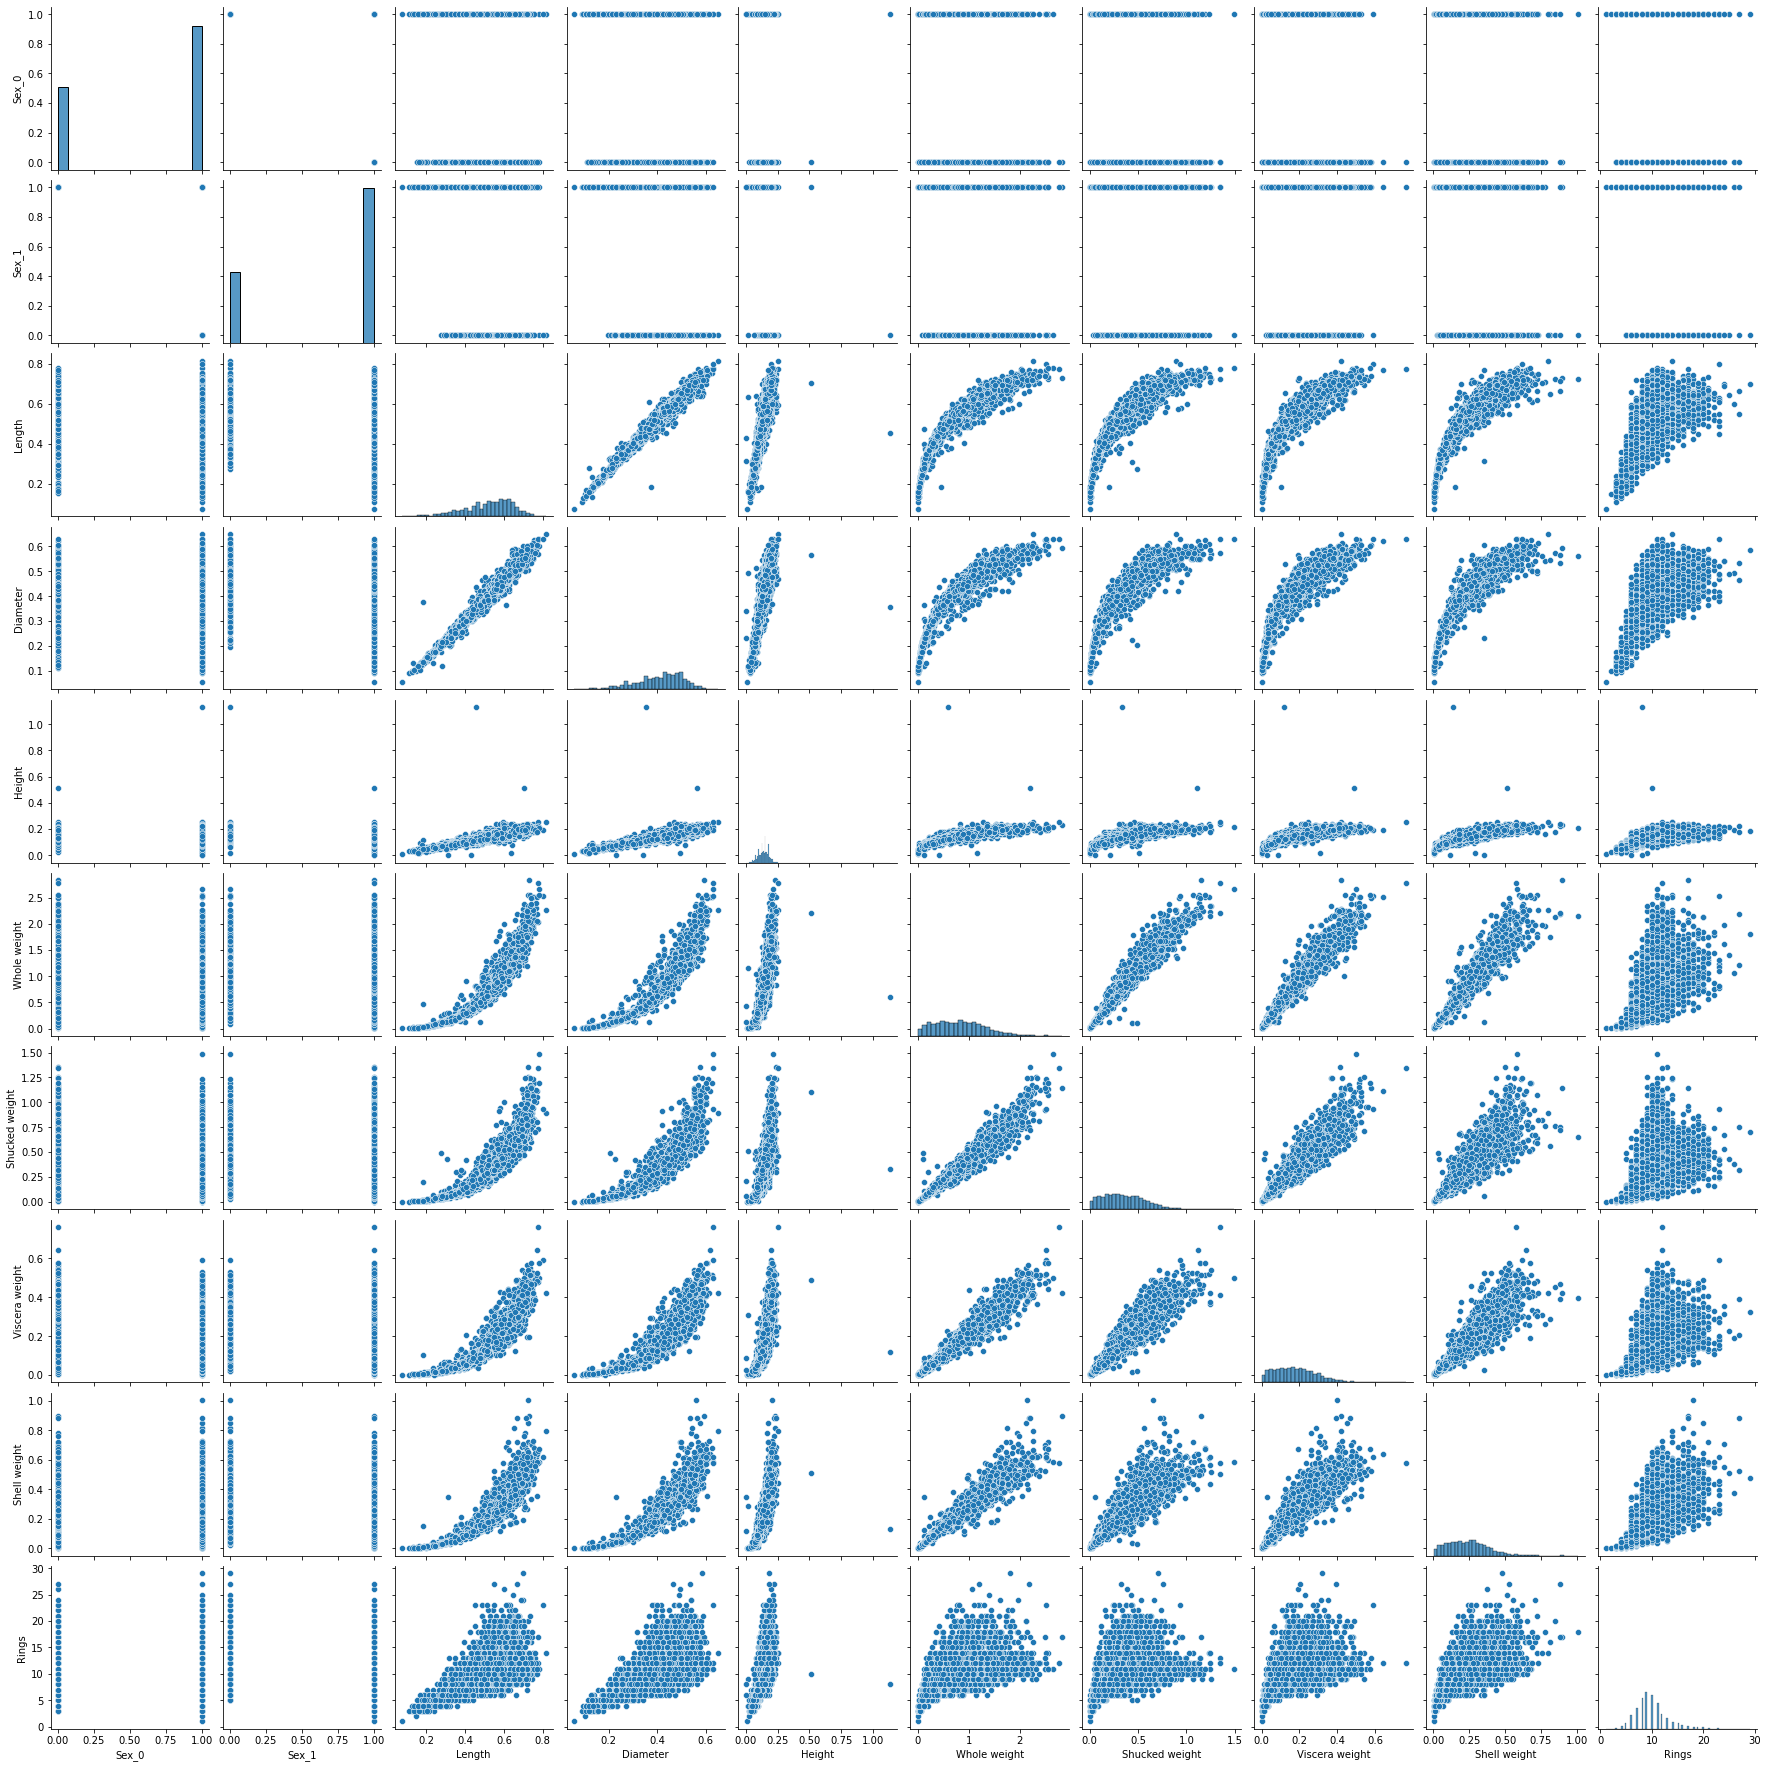

In [23]:
# to see the relationships between two variables
sns.pairplot(df)
plt.show()

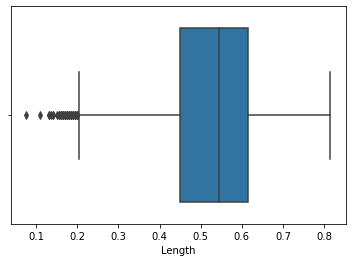

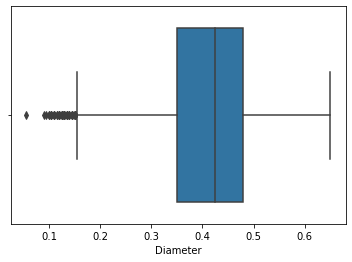

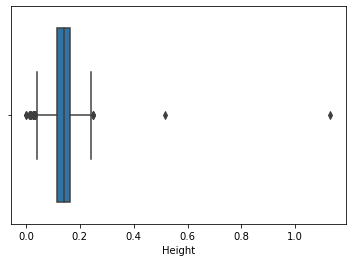

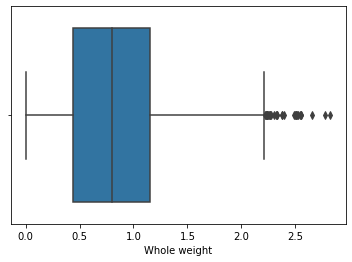

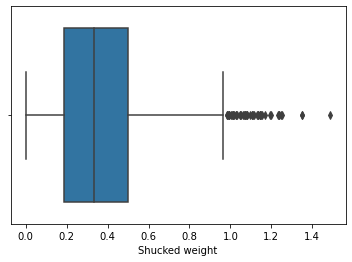

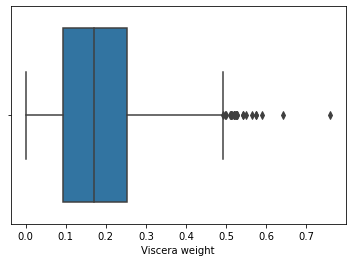

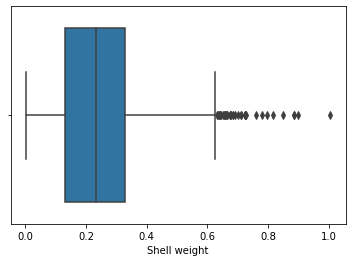

In [24]:
# to check the outliers in the dataframe
for i in df_cont:
    sns.boxplot(df[i])
    plt.show()

the observations from the data presented above are as follows -

1 - outliers present in all features
2 - remove the outliers
3 - using zscore to remove the outliers

In [26]:
# removing the outliers the zscore method
print(df.shape)

from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print(df_new.shape)

(4177, 10)
(4027, 10)


In [27]:
# making a note of the lost data
data_lost = (4177-4027)*100/4177
data_lost

3.5910940866650707

In [28]:
x = df_new.drop('Rings',axis=1)
y = df_new['Rings']

In [29]:
# to detect the severity of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif

[3.9578067556913203,
 4.686396769972034,
 765.849991831837,
 767.6373309232127,
 92.27360174833566,
 443.60077496599973,
 108.68894218069367,
 66.45228288513768,
 95.74942699708195]

the observations from the data presented above are as follows -

1 - only variables with a vif less than 5 will be included in the model

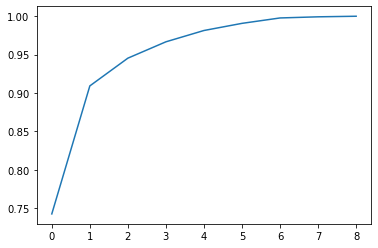

In [30]:
# using principal component analysis technique to handle multicollinearity
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_new = scaler.fit_transform(x) # Not essential as already data within range 0,1

pca = PCA()
pca.fit_transform(x_new)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [34]:
pca = PCA(n_components=6)
new = pca.fit_transform(x_new)
PC = pd.DataFrame(new, columns=['PC1','PC2','PC3','PC4','PC5','PC6'])
x = PC

vif = pd.DataFrame()
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
print('VIF = ',vif,'\n')

print('skewness:', x.skew())

VIF =  [1.0000000000000007, 1.0000000000000004, 0.9999999999999996, 1.0000000000000004, 0.9999999999999996, 1.000000000000001] 

skewness: PC1   -0.073708
PC2    0.027018
PC3    0.186954
PC4    0.411872
PC5   -0.429910
PC6    0.455670
dtype: float64


the observations from the data presented above are as follows -

1 - multicollinearity of vif less than 5 achieved

In [39]:
# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

for i in range(0,1000):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr,ytr)
    predytr = lr.predict(xtr)
    predyt = lr.predict(xt)
    
    if round(r2_score(ytr,predytr)*100,1) == round(r2_score(yt,predyt)*100,1):
             print('at rs',i,'model preforms well')
             print('test score =',(r2_score(yt,predyt)*100))

at rs 38 model preforms well
test score = 50.946503955978216
at rs 181 model preforms well
test score = 50.880783171531995
at rs 226 model preforms well
test score = 50.92579249281197
at rs 492 model preforms well
test score = 50.93668489537085
at rs 525 model preforms well
test score = 50.85971796066637
at rs 638 model preforms well
test score = 50.86021813818282
at rs 797 model preforms well
test score = 50.898713217498745
at rs 887 model preforms well
test score = 50.91074501935277
at rs 894 model preforms well
test score = 50.872978795041405
at rs 916 model preforms well
test score = 50.85422509404933
at rs 968 model preforms well
test score = 50.92528762814813


In [40]:
xtr, xt, ytr, yt = train_test_split(x,y, random_state=38,test_size=0.2)
lr.fit(xtr,ytr)

predytr = lr.predict(xtr)
predyt = lr.predict(xt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.5094650395597822
mean absolute error = 1.5023706881194567
mean squared error = 4.112301372320418


In [41]:
# to check for overfitting
from sklearn.model_selection import cross_val_score

predyt = lr.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(lr,x,y,cv=3)
lsc = lsc.mean()
print('at cv =',3)
print('cv score =',lsc)
print('r2_score of test =',lss)

at cv = 3
cv score = 0.49370983412295616
r2_score of test = 0.5094650395597822


the observations from the data presented above are as follows -

1 - the problem of overfitting resolved

In [62]:
# using regularization technique i.e. the lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

model = Lasso()

parameters = {'alpha':[0.0001,0.001, 0.01,0.1, 1, 10], 'random_state':list(range(0,20))}

gsv = GridSearchCV(model, parameters)

gsv.fit(xtr,ytr)

print(gsv.best_estimator_)

model = (gsv.best_estimator_)
model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)
print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

Lasso(alpha=0.0001, random_state=0)
test score = 0.5094693885839143
mean absolute error = 1.502355427261084
mean squared error = 4.112264913149616


In [63]:
# using random forest classifier
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.5178846515107252
mean absolute error = 1.4658684863523572
mean squared error = 4.041717245657568


In [64]:
# using the decision tree regressor to train the model in the structure of a tree
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.0748769806171139
mean absolute error = 1.9913151364764268
mean squared error = 7.755583126550868


In [65]:
# using svr
from sklearn.svm import SVR

model = SVR()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.5361098106252811
mean absolute error = 1.3954588747448113
mean squared error = 3.8889302826849668


In [66]:
# using gradient boosting 
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.5483044916500541
mean absolute error = 1.4220598129614592
mean squared error = 3.786698622237809


In [67]:
# using the non-parametric, supervised learning classifier i.e. the k-NN
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()

model.fit(xtr,ytr)
predyt = model.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.4876200755293749
mean absolute error = 1.5193548387096774
mean squared error = 4.295434243176179


the observations from the data presented above are as follows -

1 - gradient boost regressor is giving the best results

In [68]:
# to build a robust and an accurate model, using hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

parameters = {'criterion':['friedman_mse', 'squared_error', 'mae','mse'],
              #'n_estimators':[50,100,150]#, 
              'max_depth' : [4,6,8,10]}

gsv = GridSearchCV(gbr, parameters)

gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

GradientBoostingRegressor(criterion='mse', max_depth=4)


In [69]:
gbr = GradientBoostingRegressor(criterion='friedman_mse', max_depth=4, n_estimators=50)
gbr.fit(xtr,ytr)
predyt = gbr.predict(xt)

testscore = r2_score(yt, predyt)

print('test score =',(r2_score(yt,predyt)))
print('mean absolute error =',(mean_absolute_error(yt,predyt)))
print('mean squared error =',(mean_squared_error(yt,predyt)))

test score = 0.5427100939292507
mean absolute error = 1.4227098842008428
mean squared error = 3.8335981325273925


In [75]:
# to check for overfitting
from sklearn.model_selection import cross_val_score

predyt = gbr.predict(xt)
lss = r2_score(yt, predyt)

lsc = cross_val_score(gbr,x,y,cv=2)
lsc = lsc.mean()
print('at cv =',2)
print('cv score =',lsc)
print('r2_score of test =',lss)

at cv = 2
cv score = 0.5220404329567547
r2_score of test = 0.5427100939292507


the observations from the data presented above are as follows -

1 - problem of overfitting has been resolved

In [82]:
# saving the model that has achieved the best performance
import pickle
filename='abalone_age.pkl'
pickle.dump(lss, open(filename,'wb'))